In [8]:
%pip install skorch
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
#from pyperch.neural.backprop_nn import BackpropModule
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
#from torch import nn, optim
#from skorch import NeuralNetClassifier
from sklearn.datasets import load_diabetes
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd 
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
from pyperch.neural.backprop_nn import BackpropModule
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping
from torch import nn, optim 
from skorch import NeuralNetClassifier
import torch

Note: you may need to restart the kernel to use updated packages.


PCA

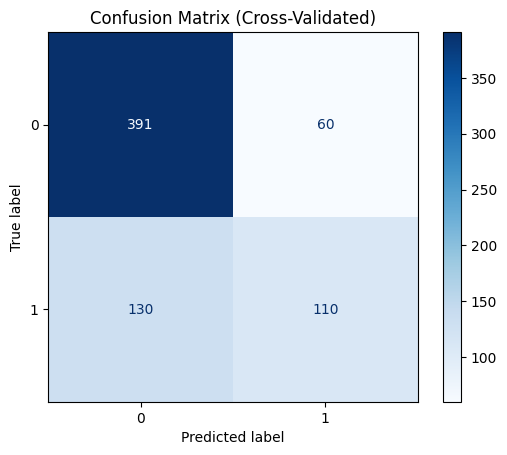

Cross-validated accuracy scores: [0.71223022 0.76811594 0.73188406 0.71014493 0.70289855]
Mean accuracy score: 0.7250547388176416
Standard deviation of accuracy score: 0.023573605389485587


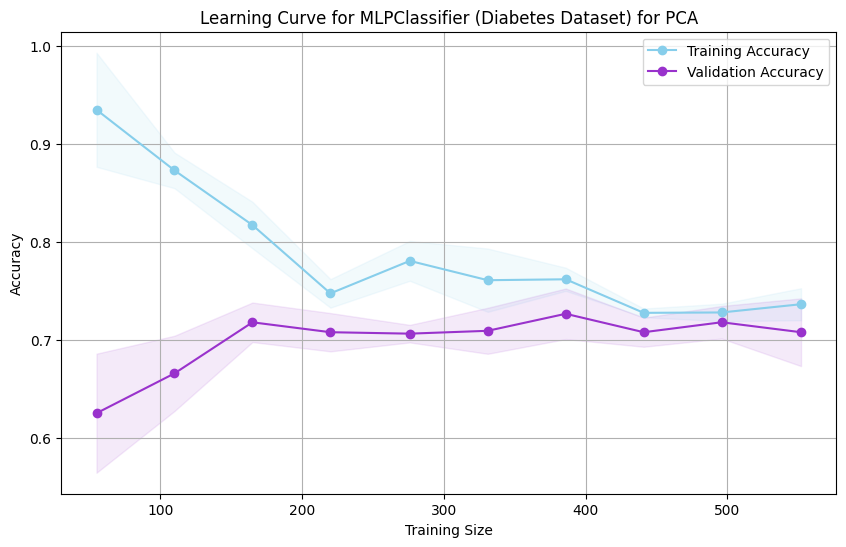

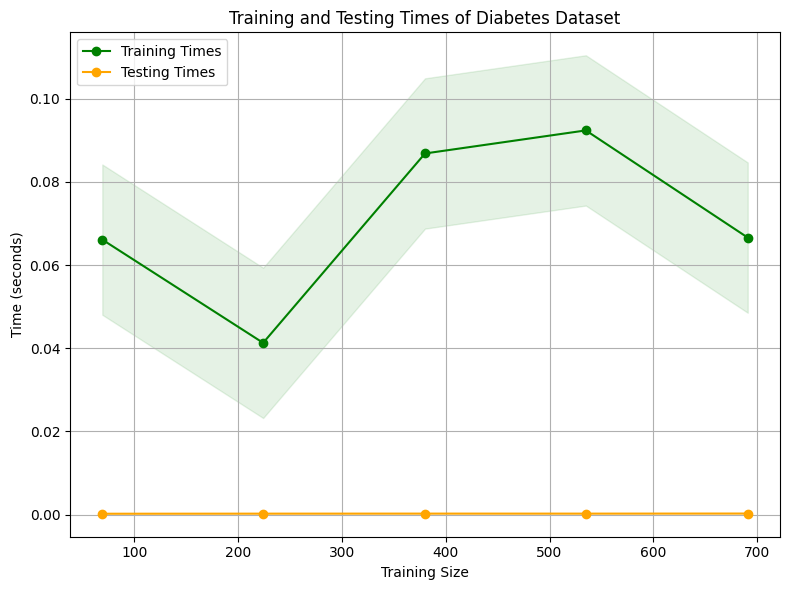

Average training duration: 0.0707 seconds
Average test duration: 0.0002 seconds


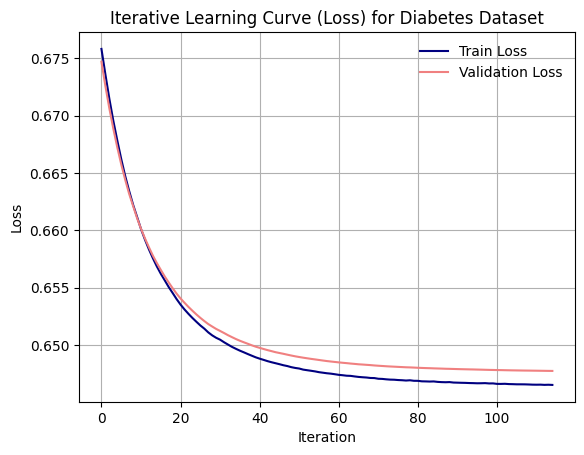

In [9]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
scaler = StandardScaler()
num_var =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
diabetes[num_var] = scaler.fit_transform(diabetes[num_var])
cols = list(diabetes.columns)
cols.insert(0, cols.pop(cols.index('Outcome')))
diabetes = diabetes[cols]
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 3
pca = PCA(n_components=n_components,random_state=42)
pca_X = pca.fit_transform(X_scaled)
# Convert PCA results to DataFrame
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(pca_X, columns=pca_columns)

# Optionally, add the 'Outcome' column to the PCA DataFrame
pca_df.insert(0, 'Outcome', y.values)
pca_df
def loading_data():
    # X1 = np.array(bank_marketing.values[:,1:-1].astype(np.float32))
    # y1 = np.array(bank_marketing.values[:,0].ravel().astype(np.int64))
    X2 = np.array(pca_df.values[:,1:-1].astype(np.float32))
    y2 = np.array(pca_df.values[:,0].ravel().astype(np.int64))
    return X2,y2

cX,cY = loading_data()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

# Example data (replace with your actual data)
# X = ... (your feature data)
# y = ... (your label data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.01, max_iter=1000, random_state=100)

# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(net, X_train, y_train, cv=5)

# Calculate accuracy scores using cross-validation
accuracy_scorer = make_scorer(accuracy_score)
cv_scores = cross_val_score(net, X_train, y_train, cv=5, scoring=accuracy_scorer)

# Fit the model on the training data
net.fit(X_train, y_train)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated)")
plt.show()

# Print the cross-validated accuracy scores
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean accuracy score: {cv_scores.mean()}")
print(f"Standard deviation of accuracy score: {cv_scores.std()}")
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Custom accuracy scorer
accuracy_scorer = make_scorer(accuracy_score)

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    net, X_train, y_train, cv=5, scoring=accuracy_scorer, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='skyblue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='skyblue', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='darkorchid', label='Validation Accuracy')
plt.title('Learning Curve for MLPClassifier (Diabetes Dataset) for PCA')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('LearningCurveforNNDiabetes', dpi=300)
plt.show()
hidden_layer_sizes = (50,)  # Hidden layer configuration

X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# Initialize the model
net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    net.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    net.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times of Diabetes Dataset")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.savefig('ClockTimesNNDiabetes.png', dpi=300)
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")

# hidden_layer_sizes = (50,)  # Hidden layer configuration

# X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# # Initialize the model
# net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
#                     learning_rate_init=0.1, random_state=100)

# # Arrays to store training and testing times
# train_times = []
# test_times = []

# # Measure the training and testing times
# train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
# train_sizes = train_sizes.astype(int)

# for train_size in train_sizes:
#     X_train_subset = X_train[:train_size]
#     y_train_subset = y_train[:train_size]
    
#     # Measure training time
#     train_start_time = time.time()
#     net.fit(X_train_subset, y_train_subset)
#     train_end_time = time.time()
    
#     train_duration = train_end_time - train_start_time
#     train_times.append(train_duration)
    
#     # Measure testing time
#     test_start_time = time.time()
#     net.predict(X_test)
#     test_end_time = time.time()
    
#     test_duration = test_end_time - test_start_time
#     test_times.append(test_duration)

# train_times = np.array(train_times)
# test_times = np.array(test_times)

# # Calculate mean and standard deviation for training times
# train_times_mean = train_times.mean()
# train_times_std = train_times.std()

# # Calculate mean and standard deviation for testing times
# test_times_mean = test_times.mean()
# test_times_std = test_times.std()

# # Plotting the training and testing times
# plt.figure(figsize=(8, 6))

# plt.fill_between(train_sizes, train_times - train_times_std,
#                  train_times + train_times_std, alpha=0.1, color='green')
# plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

# plt.fill_between(train_sizes, test_times - test_times_std,
#                  test_times + test_times_std, alpha=0.1, color='orange')
# plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

# plt.title("Training and Testing Times of Diabetes Dataset")
# plt.xlabel("Training Size")
# plt.ylabel("Time (seconds)")
# plt.grid(visible=True)
# plt.legend(loc="best")

# plt.tight_layout()
# plt.savefig('ClockTimesNNDiabetes.png', dpi=300)
# plt.show()

# print(f"Average training duration: {train_times_mean:.4f} seconds")
# print(f"Average test duration: {test_times_mean:.4f} seconds")
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping
import random


def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
seed = 100
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=cX.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=1000,
    verbose=0,
    
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    
)
net.fit(cX,cY)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss) for Diabetes Dataset")
plt.grid(visible=True)
plt.legend(frameon=False)
#y_proba = net.predict_proba(X2.values.astype(np.float32))

ICA

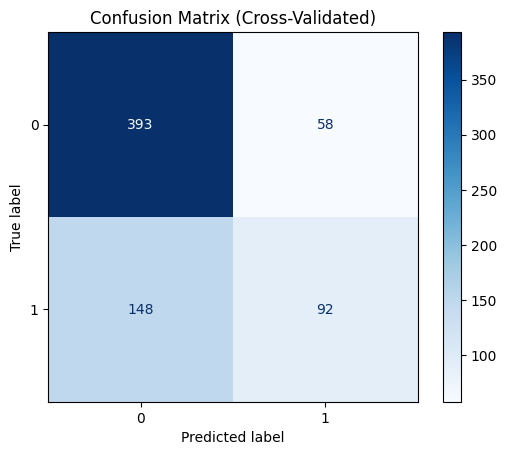

Cross-validated accuracy scores: [0.71223022 0.70289855 0.7173913  0.71014493 0.66666667]
Mean accuracy score: 0.7018663330205401
Standard deviation of accuracy score: 0.01820468024170709


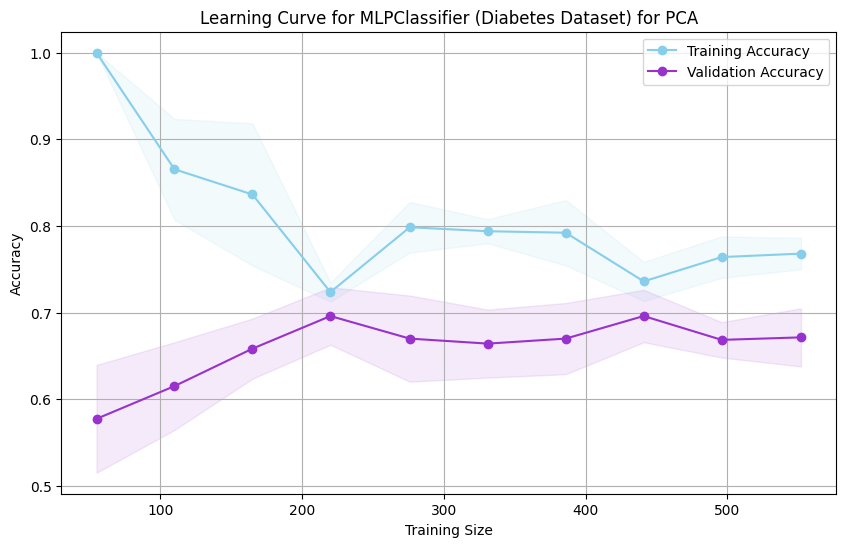

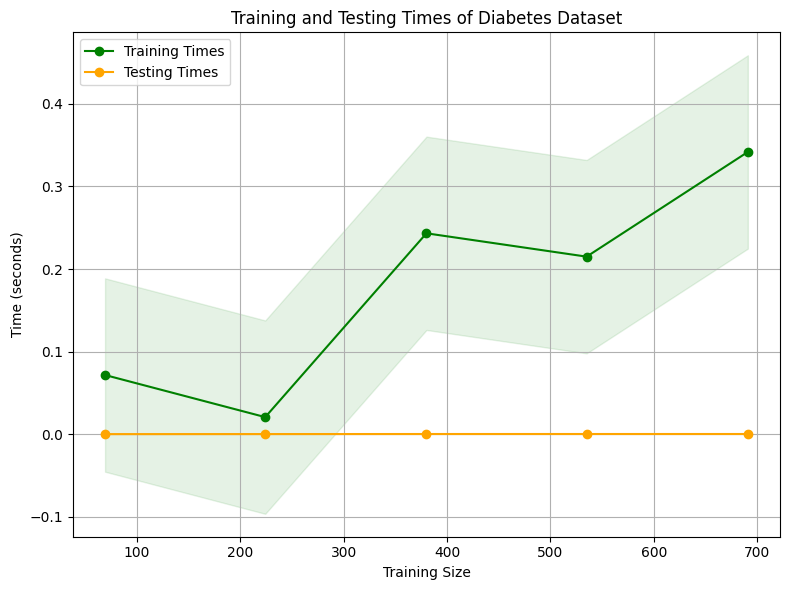

Average training duration: 0.1785 seconds
Average test duration: 0.0003 seconds


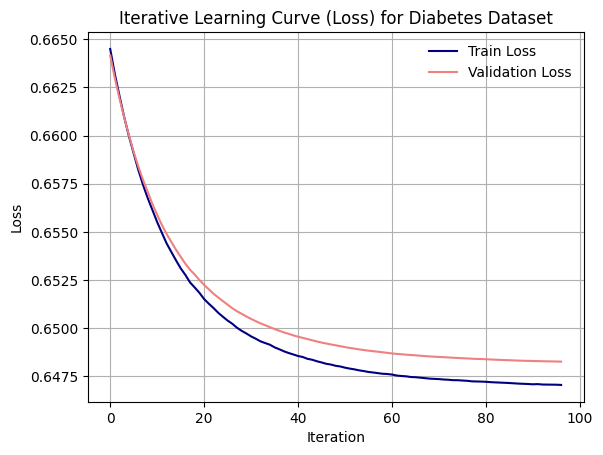

In [19]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
scaler = StandardScaler()
num_var =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
diabetes[num_var] = scaler.fit_transform(diabetes[num_var])
cols = list(diabetes.columns)
cols.insert(0, cols.pop(cols.index('Outcome')))
diabetes = diabetes[cols]
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ica = FastICA(n_components=n_components, random_state=42)
# ica_X = ica.fit_transform(X_scaled)

n_components = 4
ica = FastICA(n_components=n_components, random_state=42)
ica_X = ica.fit_transform(X_scaled)


# n_components = 3
# pca = PCA(n_components=n_components)
# pca_X = pca.fit_transform(X_scaled)
# Convert PCA results to DataFrame
ica_columns = [f'IC{i+1}' for i in range(n_components)]
ica_df = pd.DataFrame(ica_X, columns=ica_columns)

# Optionally, add the 'Outcome' column to the PCA DataFrame
ica_df.insert(0, 'Outcome', y.values)

def loading_data():
    # X1 = np.array(bank_marketing.values[:,1:-1].astype(np.float32))
    # y1 = np.array(bank_marketing.values[:,0].ravel().astype(np.int64))
    X2 = np.array(ica_df.values[:,1:-1].astype(np.float32))
    y2 = np.array(ica_df.values[:,0].ravel().astype(np.int64))
    return X2,y2

cX,cY = loading_data()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

# Example data (replace with your actual data)
# X = ... (your feature data)
# y = ... (your label data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.01, max_iter=1000, random_state=100)

# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(net, X_train, y_train, cv=5)

# Calculate accuracy scores using cross-validation
accuracy_scorer = make_scorer(accuracy_score)
cv_scores = cross_val_score(net, X_train, y_train, cv=5, scoring=accuracy_scorer)

# Fit the model on the training data
net.fit(X_train, y_train)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated)")
plt.show()

# Print the cross-validated accuracy scores
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean accuracy score: {cv_scores.mean()}")
print(f"Standard deviation of accuracy score: {cv_scores.std()}")
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Custom accuracy scorer
accuracy_scorer = make_scorer(accuracy_score)

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    net, X_train, y_train, cv=5, scoring=accuracy_scorer, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='skyblue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='skyblue', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='darkorchid', label='Validation Accuracy')
plt.title('Learning Curve for MLPClassifier (Diabetes Dataset) for PCA')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('LearningCurveforNNDiabetes', dpi=300)
plt.show()
hidden_layer_sizes = (50,)  # Hidden layer configuration

X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# Initialize the model
net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    net.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    net.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times of Diabetes Dataset")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.savefig('ClockTimesNNDiabetes.png', dpi=300)
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")

# hidden_layer_sizes = (50,)  # Hidden layer configuration

# X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# # Initialize the model
# net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
#                     learning_rate_init=0.1, random_state=100)

# # Arrays to store training and testing times
# train_times = []
# test_times = []

# # Measure the training and testing times
# train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
# train_sizes = train_sizes.astype(int)

# for train_size in train_sizes:
#     X_train_subset = X_train[:train_size]
#     y_train_subset = y_train[:train_size]
    
#     # Measure training time
#     train_start_time = time.time()
#     net.fit(X_train_subset, y_train_subset)
#     train_end_time = time.time()
    
#     train_duration = train_end_time - train_start_time
#     train_times.append(train_duration)
    
#     # Measure testing time
#     test_start_time = time.time()
#     net.predict(X_test)
#     test_end_time = time.time()
    
#     test_duration = test_end_time - test_start_time
#     test_times.append(test_duration)

# train_times = np.array(train_times)
# test_times = np.array(test_times)

# # Calculate mean and standard deviation for training times
# train_times_mean = train_times.mean()
# train_times_std = train_times.std()

# # Calculate mean and standard deviation for testing times
# test_times_mean = test_times.mean()
# test_times_std = test_times.std()

# # Plotting the training and testing times
# plt.figure(figsize=(8, 6))

# plt.fill_between(train_sizes, train_times - train_times_std,
#                  train_times + train_times_std, alpha=0.1, color='green')
# plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

# plt.fill_between(train_sizes, test_times - test_times_std,
#                  test_times + test_times_std, alpha=0.1, color='orange')
# plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

# plt.title("Training and Testing Times of Diabetes Dataset")
# plt.xlabel("Training Size")
# plt.ylabel("Time (seconds)")
# plt.grid(visible=True)
# plt.legend(loc="best")

# plt.tight_layout()
# plt.savefig('ClockTimesNNDiabetes.png', dpi=300)
# plt.show()

# print(f"Average training duration: {train_times_mean:.4f} seconds")
# print(f"Average test duration: {test_times_mean:.4f} seconds")
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping
import random


def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
seed = 100
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=cX.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=1000,
    verbose=0,
    
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    
)
net.fit(cX,cY)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss) for Diabetes Dataset")
plt.grid(visible=True)
plt.legend(frameon=False)
#y_proba = net.predict_proba(X2.values.astype(np.float32))

RP

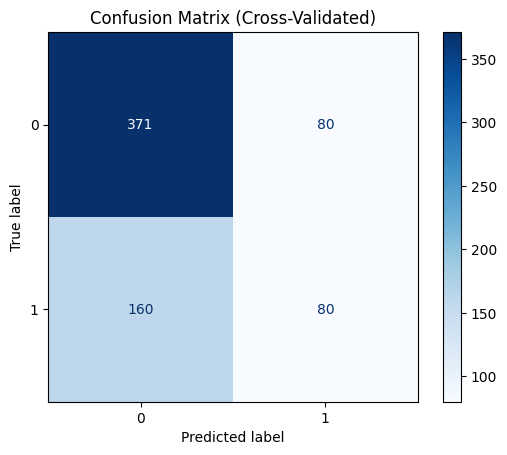

Cross-validated accuracy scores: [0.64028777 0.70289855 0.65217391 0.65942029 0.60869565]
Mean accuracy score: 0.6526952351162548
Standard deviation of accuracy score: 0.03051484730777917


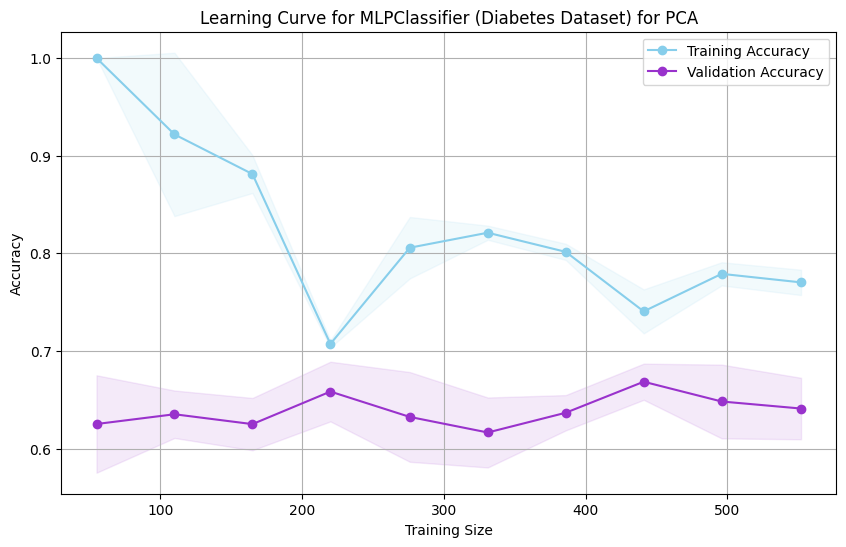

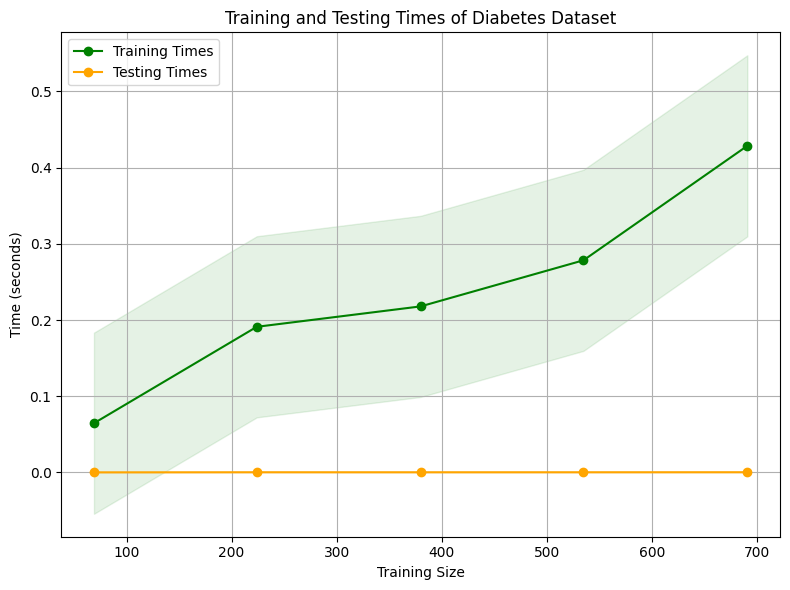

Average training duration: 0.2361 seconds
Average test duration: 0.0003 seconds


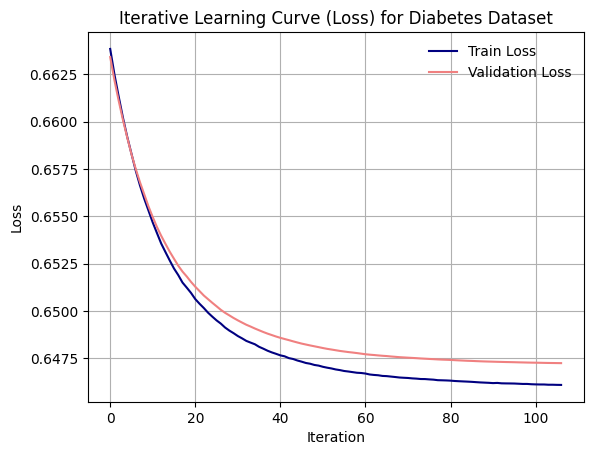

In [18]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
scaler = StandardScaler()
num_var =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
diabetes[num_var] = scaler.fit_transform(diabetes[num_var])
cols = list(diabetes.columns)
cols.insert(0, cols.pop(cols.index('Outcome')))
diabetes = diabetes[cols]
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


n_components = 4
rp = GaussianRandomProjection(n_components=n_components, random_state=42)
rp_X = rp.fit_transform(X_scaled)

# n_components = 3
# pca = PCA(n_components=n_components)
# pca_X = pca.fit_transform(X_scaled)
# Convert PCA results to DataFrame
rp_columns = [f'rp{i+1}' for i in range(n_components)]
rp_df = pd.DataFrame(rp_X, columns=rp_columns)

# Optionally, add the 'Outcome' column to the PCA DataFrame
rp_df.insert(0, 'Outcome', y.values)
rp_df
def loading_data():
    # X1 = np.array(bank_marketing.values[:,1:-1].astype(np.float32))
    # y1 = np.array(bank_marketing.values[:,0].ravel().astype(np.int64))
    X2 = np.array(rp_df.values[:,1:-1].astype(np.float32))
    y2 = np.array(rp_df.values[:,0].ravel().astype(np.int64))
    return X2,y2

cX,cY = loading_data()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

# Example data (replace with your actual data)
# X = ... (your feature data)
# y = ... (your label data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.01, max_iter=1000, random_state=100)

# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(net, X_train, y_train, cv=5)

# Calculate accuracy scores using cross-validation
accuracy_scorer = make_scorer(accuracy_score)
cv_scores = cross_val_score(net, X_train, y_train, cv=5, scoring=accuracy_scorer)

# Fit the model on the training data
net.fit(X_train, y_train)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated)")
plt.show()

# Print the cross-validated accuracy scores
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean accuracy score: {cv_scores.mean()}")
print(f"Standard deviation of accuracy score: {cv_scores.std()}")
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Custom accuracy scorer
accuracy_scorer = make_scorer(accuracy_score)

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    net, X_train, y_train, cv=5, scoring=accuracy_scorer, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='skyblue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='skyblue', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='darkorchid', label='Validation Accuracy')
plt.title('Learning Curve for MLPClassifier (Diabetes Dataset) for PCA')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('LearningCurveforNNDiabetes', dpi=300)
plt.show()
hidden_layer_sizes = (50,)  # Hidden layer configuration

X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# Initialize the model
net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    net.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    net.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times of Diabetes Dataset")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.savefig('ClockTimesNNDiabetes.png', dpi=300)
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")

# hidden_layer_sizes = (50,)  # Hidden layer configuration

# X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# # Initialize the model
# net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
#                     learning_rate_init=0.1, random_state=100)

# # Arrays to store training and testing times
# train_times = []
# test_times = []

# # Measure the training and testing times
# train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
# train_sizes = train_sizes.astype(int)

# for train_size in train_sizes:
#     X_train_subset = X_train[:train_size]
#     y_train_subset = y_train[:train_size]
    
#     # Measure training time
#     train_start_time = time.time()
#     net.fit(X_train_subset, y_train_subset)
#     train_end_time = time.time()
    
#     train_duration = train_end_time - train_start_time
#     train_times.append(train_duration)
    
#     # Measure testing time
#     test_start_time = time.time()
#     net.predict(X_test)
#     test_end_time = time.time()
    
#     test_duration = test_end_time - test_start_time
#     test_times.append(test_duration)

# train_times = np.array(train_times)
# test_times = np.array(test_times)

# # Calculate mean and standard deviation for training times
# train_times_mean = train_times.mean()
# train_times_std = train_times.std()

# # Calculate mean and standard deviation for testing times
# test_times_mean = test_times.mean()
# test_times_std = test_times.std()

# # Plotting the training and testing times
# plt.figure(figsize=(8, 6))

# plt.fill_between(train_sizes, train_times - train_times_std,
#                  train_times + train_times_std, alpha=0.1, color='green')
# plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

# plt.fill_between(train_sizes, test_times - test_times_std,
#                  test_times + test_times_std, alpha=0.1, color='orange')
# plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

# plt.title("Training and Testing Times of Diabetes Dataset")
# plt.xlabel("Training Size")
# plt.ylabel("Time (seconds)")
# plt.grid(visible=True)
# plt.legend(loc="best")

# plt.tight_layout()
# plt.savefig('ClockTimesNNDiabetes.png', dpi=300)
# plt.show()

# print(f"Average training duration: {train_times_mean:.4f} seconds")
# print(f"Average test duration: {test_times_mean:.4f} seconds")
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping
import random


def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
seed = 100
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=cX.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=1000,
    verbose=0,
    
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    
)
net.fit(cX,cY)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss) for Diabetes Dataset")
plt.grid(visible=True)
plt.legend(frameon=False)
#y_proba = net.predict_proba(X2.values.astype(np.float32))

In [ ]:
# Optionally, add the 'Outcome' column to the PCA DataFrame
rp_df.insert(0, 'Outcome', y.values)
rp_df
def loading_data():
    # X1 = np.array(bank_marketing.values[:,1:-1].astype(np.float32))
    # y1 = np.array(bank_marketing.values[:,0].ravel().astype(np.int64))
    X2 = np.array(rp_df.values[:,1:-1].astype(np.float32))
    y2 = np.array(rp_df.values[:,0].ravel().astype(np.int64))
    return X2,y2

cX,cY = loading_data()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

# Example data (replace with your actual data)
# X = ... (your feature data)
# y = ... (your label data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.01, max_iter=1000, random_state=100)

# Perform cross-validation and get predictions
cv_predictions = cross_val_predict(net, X_train, y_train, cv=5)

# Calculate accuracy scores using cross-validation
accuracy_scorer = make_scorer(accuracy_score)
cv_scores = cross_val_score(net, X_train, y_train, cv=5, scoring=accuracy_scorer)

# Fit the model on the training data
net.fit(X_train, y_train)

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cv_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Cross-Validated)")
plt.show()

# Print the cross-validated accuracy scores
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean accuracy score: {cv_scores.mean()}")
print(f"Standard deviation of accuracy score: {cv_scores.std()}")
X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)

# Initialize the model
net = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Custom accuracy scorer
accuracy_scorer = make_scorer(accuracy_score)

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    net, X_train, y_train, cv=5, scoring=accuracy_scorer, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='skyblue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, 'o-', color='skyblue', label='Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='darkorchid', label='Validation Accuracy')
plt.title('Learning Curve for MLPClassifier (Diabetes Dataset) for PCA')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('LearningCurveforNNDiabetes', dpi=300)
plt.show()
hidden_layer_sizes = (50,)  # Hidden layer configuration

X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# Initialize the model
net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
                    learning_rate_init=0.1, random_state=100)

# Arrays to store training and testing times
train_times = []
test_times = []

# Measure the training and testing times
train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
train_sizes = train_sizes.astype(int)

for train_size in train_sizes:
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]
    
    # Measure training time
    train_start_time = time.time()
    net.fit(X_train_subset, y_train_subset)
    train_end_time = time.time()
    
    train_duration = train_end_time - train_start_time
    train_times.append(train_duration)
    
    # Measure testing time
    test_start_time = time.time()
    net.predict(X_test)
    test_end_time = time.time()
    
    test_duration = test_end_time - test_start_time
    test_times.append(test_duration)

train_times = np.array(train_times)
test_times = np.array(test_times)

# Calculate mean and standard deviation for training times
train_times_mean = train_times.mean()
train_times_std = train_times.std()

# Calculate mean and standard deviation for testing times
test_times_mean = test_times.mean()
test_times_std = test_times.std()

# Plotting the training and testing times
plt.figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_times - train_times_std,
                 train_times + train_times_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

plt.fill_between(train_sizes, test_times - test_times_std,
                 test_times + test_times_std, alpha=0.1, color='orange')
plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

plt.title("Training and Testing Times of Diabetes Dataset")
plt.xlabel("Training Size")
plt.ylabel("Time (seconds)")
plt.grid(visible=True)
plt.legend(loc="best")

plt.tight_layout()
plt.savefig('ClockTimesNNDiabetes.png', dpi=300)
plt.show()

print(f"Average training duration: {train_times_mean:.4f} seconds")
print(f"Average test duration: {test_times_mean:.4f} seconds")

# hidden_layer_sizes = (50,)  # Hidden layer configuration

# X_train, X_test, y_train, y_test = train_test_split(cX, cY, test_size=0.10, random_state=25)
# # Initialize the model
# net = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', activation='logistic', 
#                     learning_rate_init=0.1, random_state=100)

# # Arrays to store training and testing times
# train_times = []
# test_times = []

# # Measure the training and testing times
# train_sizes = np.linspace(0.1, 1.0, 5) * len(X_train)
# train_sizes = train_sizes.astype(int)

# for train_size in train_sizes:
#     X_train_subset = X_train[:train_size]
#     y_train_subset = y_train[:train_size]
    
#     # Measure training time
#     train_start_time = time.time()
#     net.fit(X_train_subset, y_train_subset)
#     train_end_time = time.time()
    
#     train_duration = train_end_time - train_start_time
#     train_times.append(train_duration)
    
#     # Measure testing time
#     test_start_time = time.time()
#     net.predict(X_test)
#     test_end_time = time.time()
    
#     test_duration = test_end_time - test_start_time
#     test_times.append(test_duration)

# train_times = np.array(train_times)
# test_times = np.array(test_times)

# # Calculate mean and standard deviation for training times
# train_times_mean = train_times.mean()
# train_times_std = train_times.std()

# # Calculate mean and standard deviation for testing times
# test_times_mean = test_times.mean()
# test_times_std = test_times.std()

# # Plotting the training and testing times
# plt.figure(figsize=(8, 6))

# plt.fill_between(train_sizes, train_times - train_times_std,
#                  train_times + train_times_std, alpha=0.1, color='green')
# plt.plot(train_sizes, train_times, 'o-', color='green', label="Training Times")

# plt.fill_between(train_sizes, test_times - test_times_std,
#                  test_times + test_times_std, alpha=0.1, color='orange')
# plt.plot(train_sizes, test_times, 'o-', color='orange', label="Testing Times")

# plt.title("Training and Testing Times of Diabetes Dataset")
# plt.xlabel("Training Size")
# plt.ylabel("Time (seconds)")
# plt.grid(visible=True)
# plt.legend(loc="best")

# plt.tight_layout()
# plt.savefig('ClockTimesNNDiabetes.png', dpi=300)
# plt.show()

# print(f"Average training duration: {train_times_mean:.4f} seconds")
# print(f"Average test duration: {test_times_mean:.4f} seconds")
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
from skorch.callbacks import EpochScoring,EarlyStopping
import random


def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
seed = 100
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=cX.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=1000,
    verbose=0,
    
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    
)
net.fit(cX,cY)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss) for Diabetes Dataset")
plt.grid(visible=True)
plt.legend(frameon=False)
#y_proba = net.predict_proba(X2.values.astype(np.float32))